In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df =pd.read_pickle('top100comunio.pckle')

In [3]:
df

Rang      Spieler  Club    Position  Marktwert Einsätze(bewertet)  Tore  \
0     1.0  Lewandowski   NaN       Sturm   27100000            17 (17)    19   
1     2.0      Haaland   NaN       Sturm   28480000            11 (11)    13   
2     3.0    T. Müller   NaN       Sturm   18390000            17 (17)     5   
3     4.0       Schick   NaN       Sturm   22060000            14 (14)    16   
4     5.0       Nkunku   NaN  Mittelfeld   15650000            17 (17)     7   
..    ...          ...   ...         ...        ...                ...   ...   
95   94.0       Akanji   NaN      Abwehr    5200000            14 (14)     0   
96   97.0       Ginter   NaN      Abwehr    5620000            15 (15)     0   
97   97.0      Brunner   NaN      Abwehr    2690000            16 (16)     0   
98   97.0        Orban   NaN      Abwehr    6860000            13 (13)     0   
99  100.0       Geiger   NaN  Mittelfeld    3960000            11 (11)     2   

    Punkte  Punkte pro Spiel  Einsätze  
0      154          9.058824        17  
1      119         10.818182        11  
2      113          6.647059        17  
3      112          8.000000        14  
4      110          6.470588        17  
..     ...               ...       ...  
95      47          3.357143        14  
96      46          3.066667        15  
97      46          2.875000        16  
98      46          3.538462        13  
99      45          4.090909        11  

[100 rows x 10 columns]

In [173]:
features = ["Tore","Punkte","Einsätze"]
response = 'Marktwert'

x_train, x_test, y_train, y_test = train_test_split(df[features], df[response], test_size=0.2, random_state=42)

In [178]:
scaler = MinMaxScaler()


X_train = scaler.fit_transform(x_train.values)
X_test = scaler.fit_transform(x_test.values)

In [9]:
X_test

array([[0.        , 0.01886792, 1.        ],
       [0.        , 0.06603774, 0.83333333],
       [0.        , 0.03773585, 1.        ],
       [0.15789474, 0.09433962, 0.83333333],
       [0.        , 0.10377358, 0.83333333],
       [0.10526316, 0.11320755, 0.5       ],
       [0.15789474, 0.26415094, 0.83333333],
       [0.26315789, 0.01886792, 0.33333333],
       [0.15789474, 0.40566038, 0.83333333],
       [1.        , 1.        , 1.        ],
       [0.36842105, 0.29245283, 1.        ],
       [0.21052632, 0.19811321, 0.83333333],
       [0.05263158, 0.02830189, 0.5       ],
       [0.31578947, 0.16037736, 0.66666667],
       [0.10526316, 0.        , 0.5       ],
       [0.36842105, 0.58490566, 1.        ],
       [0.05263158, 0.01886792, 0.        ],
       [0.26315789, 0.01886792, 0.83333333],
       [0.21052632, 0.40566038, 0.66666667],
       [0.        , 0.18867925, 1.        ]])

In [11]:
input_size = X_train.shape[1]
hidden_size = 1000
input_weights = np.random.normal(size=[input_size,hidden_size])
biases = np.random.normal(size=[hidden_size])

In [95]:
from skelm import ELMRegressor
model = ELMRegressor(n_neurons=(100,50),
                     ufunc='sigm',
                     random_state=42
                  )

In [96]:
model.fit(X_train,y_train)
print("train:",model.score(X_train,y_train))
print("test:",model.score(X_test,y_test))

train: 0.7565763628845792
test: 0.7318553782688128


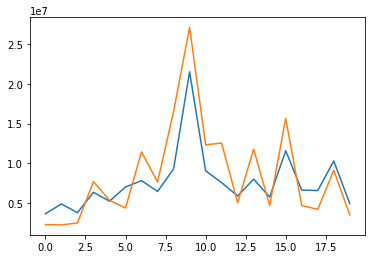

In [128]:
from matplotlib import pyplot as plt

predictions=model.predict(X_test)
plt.plot(predictions)
plt.plot(y_test.values)

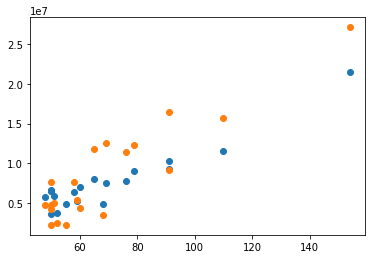

In [136]:
plt.scatter(x_test['Punkte'].values,predictions)
plt.scatter(x_test['Punkte'].values,y_test.values)

In [179]:
## Ausprobieren 

valData=[[1,100,1]]
inputData=scaler.fit_transform(valData) ## scale wie oben..
print(inputData)

model.predict(inputData)

[[0. 0. 0.]]


array([6360471.25003386])

In [159]:
validateData= np.array([0.        , 0.04054054, 0.57142857])
model.predict([validateData])

array([5655193.8463316])

In [162]:
X_train

array([[0.25      , 0.13513514, 0.71428571],
       [0.0625    , 0.04054054, 0.85714286],
       [0.125     , 0.35135135, 0.71428571],
       [0.25      , 0.2027027 , 0.85714286],
       [0.        , 0.09459459, 0.57142857],
       [0.3125    , 0.51351351, 1.        ],
       [0.125     , 0.2027027 , 0.71428571],
       [0.        , 0.01351351, 0.71428571],
       [0.3125    , 0.66216216, 0.71428571],
       [0.125     , 0.08108108, 0.71428571],
       [0.125     , 0.62162162, 1.        ],
       [0.0625    , 0.16216216, 0.57142857],
       [0.3125    , 0.05405405, 0.71428571],
       [0.5625    , 0.33783784, 1.        ],
       [0.125     , 0.02702703, 0.57142857],
       [0.6875    , 0.81081081, 1.        ],
       [0.0625    , 0.10810811, 0.57142857],
       [0.        , 0.10810811, 0.85714286],
       [0.125     , 0.25675676, 0.71428571],
       [0.0625    , 0.5       , 1.        ],
       [0.375     , 0.16216216, 0.85714286],
       [0.0625    , 0.25675676, 0.85714286],
       [0.

In [167]:
scaler.inverse_fit_transform(X_train)

AttributeError: 'MinMaxScaler' object has no attribute 'inverse_fit_transform'

In [ ]:
#wie kann man mit eingabe-daten testen/predicenten?
#wie geht normalize der eingabe daten
# regression für FNN ? 
